In [3]:
# Library Imports
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model, np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
# Network parameters
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True

In [5]:
# Load cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
# Flatten data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
# Convert to one-hot vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# Deep Learning model: 3-layer CNN network 
model = Sequential()
# CNN 1
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# CNN 2
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
# CNN 3
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))    
model.add(Flatten())
# Dropout added as regularizer
model.add(Dropout(0.2))
# Dense output
model.add(Dense(num_classes, activation = 'softmax'))             






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# Model Compile
model.compile(loss = 'categorical_crossentropy', optimizer ='sgd', metrics = ['accuracy'])

In [10]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)        

In [11]:
# Fit Model
model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
50000/50000 [==============================] - 36s 717us/step - loss: 2.0982 - acc: 0.2199
Epoch 2/100
50000/50000 [==============================] - 29s 587us/step - loss: 1.8224 - acc: 0.3402
Epoch 3/100
50000/50000 [==============================] - 29s 585us/step - loss: 1.6407 - acc: 0.4062
Epoch 4/100
50000/50000 [==============================] - 29s 588us/step - loss: 1.5183 - acc: 0.4503
Epoch 5/100
50000/50000 [==============================] - 30s 592us/step - loss: 1.4315 - acc: 0.4834
Epoch 6/100
50000/50000 [==============================] - 29s 588us/step - loss: 1.3631 - acc: 0.5146
Epoch 7/100
50000/50000 [==============================] - 29s 587us/step - loss: 1.3048 - acc: 0.5380
Epoch 8/100
50000/50000 [==============================] - 29s 584us/step - loss: 1.2529 - acc: 0.5585
Epoch 9/100
50000/50000 [==============================] - 29s 585us/step - loss: 

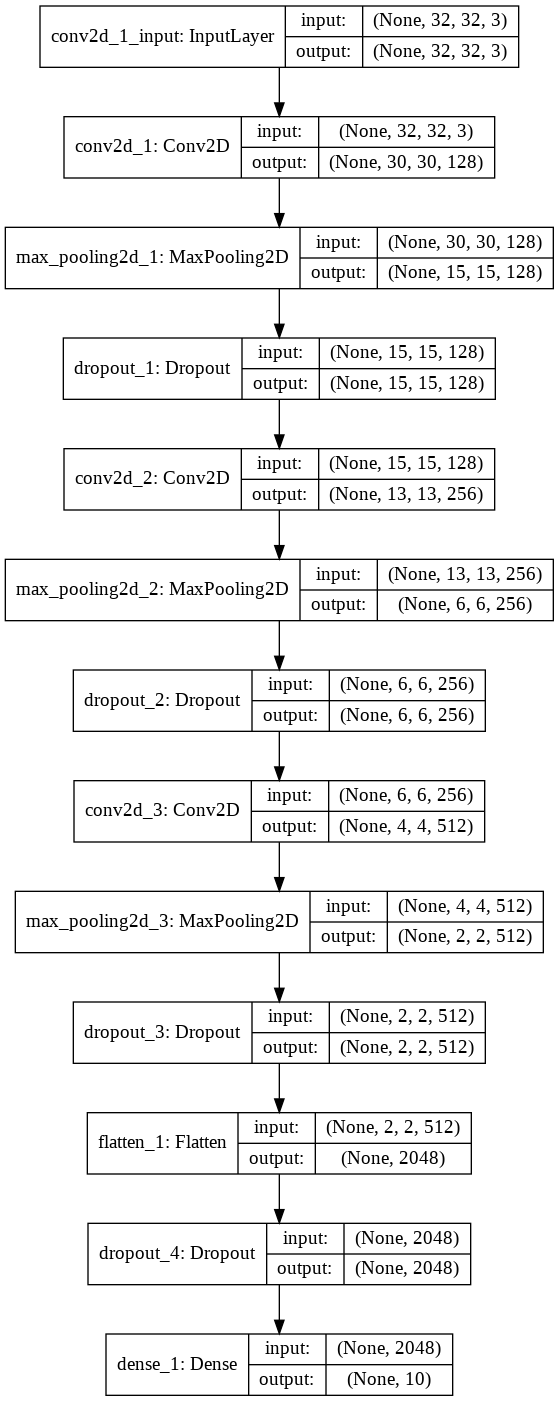

In [12]:
# Plot output       
plot_model(model, to_file = 'cnn-cifar10.png', show_shapes = True)

In [13]:
# Print accuracy
loss, acc = model.evaluate(x_test, y_test, batch_size = 32)
print("Test accuracy: %.2f%%" % (100 * acc))

10000/10000 [==============================] - 2s 200us/step
Test accuracy: 81.58%
